In [ ]:
#default_exp Callbacks.Tensorboard

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Tensorboard
> Learning to use the tensorboard callback in fastaiv2

# Recap

Notes following the first lesson of the fastai 2019 Deep Learning for Practitioners Course. Code follows the lesson using fastaiv2, fastcore and is documented using the nbdev library.

To start make sure you can import the fastai2 library and nbdev.

In [ ]:
#export
from fastai2.data.all import *
from fastai2.vision.all import *
from nbdev.showdoc import *

In [ ]:
#exports
path = untar_data(URLs.PETS)

In [ ]:
#exports
path_anno, path_img = [path/folder for folder in path.ls()]

In [ ]:
#exports
fname = get_image_files(path_img)
fname[:5]

(#5) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/Sphynx_48.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/samoyed_126.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/boxer_20.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/scottish_terrier_161.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/shiba_inu_84.jpg')]

In [ ]:
#exports
pat = r'/(\w+)_\d+.jpg'

dblock = DataBlock((ImageBlock,CategoryBlock),
                    splitter=RandomSplitter(),
                    get_items=get_image_files,
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms(),
                    get_y=RegexLabeller(pat))

In [ ]:
#exports
dls = dblock.dataloaders(path_img, bs=4)

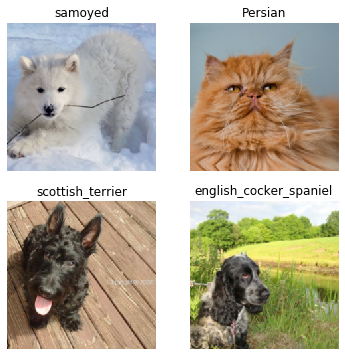

In [ ]:
dls.show_batch()

# TensorBoard
Next we are going to integrate tensorboard to our training.

In [ ]:
import tensorboard

from fastai2.callback.tensorboard import TensorBoardCallback

In [ ]:
project_id = "PDL2019Lesson1"
tboard_path = Path('../tensorboard/' + project_id)

In [ ]:
callbacks = (TensorBoardCallback(log_dir=tboard_path))

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate)
learner.fit_one_cycle(4, cbs=callbacks)
learner.show_results()

AttributeError: 'NBMasterBar' object has no attribute 'out'